# Import and analyze socioeconomic data
### Load the socioeconomic data

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
cwd = os.getcwd()

## For county separated data
#input_files = os.listdir(cwd+"\Raw data")

## For all of Bay Area
input_files = os.listdir(cwd+"\Raw Bay Area data")
print input_files

['Bay Area - Jan 2019 - Mortgage_Ranking_2019-01-14_09-49-46.csv', 'Bay Area Extra Data_housing values and rent.csv', 'Bay Area Extra Data_Ranking_2018-07-02_15-18-48.csv', 'Bay Area Extra Data_Ranking_Savings_family_hhs.csv', 'Bay Area_Ranking_2018-06-01_15-46-03.csv']


In [2]:
# Load and merge all the socioeconomic data together
df_from_each_file = (pd.read_csv(cwd+"\Raw Bay Area data\\"+f) for f in input_files)
for i,file_df in enumerate(df_from_each_file):
    if i == 0:
         df_socio  = file_df
    else:
        df_socio   = df_socio.merge(file_df,on = 'FIPS',how = 'inner',suffixes = ('',str(i)))
df_socio = df_socio.T.drop_duplicates().T#, ignore_index=True,axis = 1)
df_socio["TRACT"] = df_socio.FIPS.astype(str).apply(lambda x: x[4:10]).astype(int) #create tract ID

### Load in census tract geographical data

In [3]:
df_census = pd.read_csv(cwd+"\\bay_area_building_exposure.txt")
df_exposure = pd.read_csv(cwd+"\\bay_area_building_exposure.txt")
print list(df_exposure)

['OBJECTID', 'GEO_ID', 'STATE', 'COUNTY', 'TRACT', 'NAME', 'LSAD', 'CENSUSAREA', 'Full_tract', 'FullTract_', 'Tract_1', 'RES1I', 'RES2I', 'RES3AI', 'RES3BI', 'RES3CI', 'RES3DI', 'RES3EI', 'RES3FI', 'RES4I', 'RES5I', 'RES6I', 'COM1I', 'COM2I', 'COM3I', 'COM4I', 'COM5I', 'COM6I', 'COM7I', 'COM8I', 'COM9I', 'COM10I', 'IND1I', 'IND2I', 'IND3I', 'IND4I', 'IND5I', 'IND6I', 'AGR1I', 'REL1I', 'GOV1I', 'GOV2I', 'EDU1I', 'EDU2I', 'TotalCount', 'ORIG_FID', 'RASTERVALU', 'POINT_X', 'POINT_Y']


### Merge the data

In [4]:
df_all_raw =  pd.merge(df_census, df_socio, on = "TRACT")
''' This is for country data
drop_columns = ['NAME','FullTract_','Tract_1'] + list(df_all_raw)[22:47] + ['FIPS'] \
+ ["% Education Attainment, High School (Pop 25+), American Indian and Alaska Native, 2017"]\
+ ["% Education Attainment, < High School (Pop 25+), American Indian and Alaska Native, 2017"]\
+ ["% Employment Male, Mining, Quarrying and Oil and Gas Extraction (Pop 16+), 2017"]\
+ ["# Employment Male, Agriculture, Forestry, Fishing and Hunting (Pop 16+), 2017"]\
+ ["% Employment Male, Agriculture, Forestry, Fishing and Hunting (Pop 16+), 2017"]\
+ ["# Employment Male, Mining, Quarrying and Oil and Gas Extraction (Pop 16+), 2017"]\
+ ['# Population Poverty Universe, 2017']\
+ ['# Employment, Accomodation and Food Services (Pop 16+), 2017']\
+ ['# Employment, Arts, Entertainment, and Recreation, 2017']\
+ ['% Employment, Accomodation and Food Services (Pop 16+), 2017']\
+ ['% Employment, Arts, Entertainment, and Recreation, 2017']
#+ ['# Employment, Management of Companies and Enterprises, 2017']\
#+ ['% Employment, Management of Companies and Enterprises, 2017']
'''
drop_columns = ['NAME','FullTract_','Tract_1','FIPS']
df_all = df_all_raw.drop(columns = drop_columns)
df_all['total_RES']=df_all.loc[:,"RES1I":'RES6I'].sum(axis=1)

#Load in aggregated structural asset value
df_asset_value = pd.read_csv("HH_total_asset_value.csv")
df_all = pd.merge(df_all,df_asset_value, how='inner', on='Full_tract')
#print df_all['total_asset_value']


print list(df_all)
print (df_all.loc[:,'Household Income, Per Capita ($), 2016']*df_all.loc[:,'# Population, 2016']).sum()#print df_all[['# Households (HHs), 2017','total_RES']]
#print df_all.loc[df_all['# Households (HHs), 2017'] < df_all.total_RES,['# Households (HHs), 2017','total_RES']]
#print df_all.loc[1,:]

['OBJECTID', 'GEO_ID', 'STATE', 'COUNTY', 'TRACT', 'LSAD', 'CENSUSAREA', 'Full_tract', 'RES1I', 'RES2I', 'RES3AI', 'RES3BI', 'RES3CI', 'RES3DI', 'RES3EI', 'RES3FI', 'RES4I', 'RES5I', 'RES6I', 'COM1I', 'COM2I', 'COM3I', 'COM4I', 'COM5I', 'COM6I', 'COM7I', 'COM8I', 'COM9I', 'COM10I', 'IND1I', 'IND2I', 'IND3I', 'IND4I', 'IND5I', 'IND6I', 'AGR1I', 'REL1I', 'GOV1I', 'GOV2I', 'EDU1I', 'EDU2I', 'TotalCount', 'ORIG_FID', 'RASTERVALU', 'POINT_X', 'POINT_Y', 'Name', 'Mortgage interest and charges ($000), 2016', 'Aggregate Mortgage Debt, 2016', '# Households Having A Mortgage Debt, 2016', 'Mortgage interest and charges (Household Average), 2016', 'Shelter (Household Average), 2016', 'Shelter ($000), 2016', 'Housing (Household Average), 2016', 'Rent ($000), 2016', 'Rent (Household Average), 2016', 'Rent as pay ($000), 2016', 'Rent as pay (Household Average), 2016', '# Total Households with Interest, Dividends, or Net Rental Income, 2016', 'Housing, Median Rent ($), 2016', 'Housing, Median Value Ow

### Answer to Stephanes question of income and type of housing

C:\Users\Mary\Anaconda2\lib\site-packages\ipykernel_launcher.py:42: RuntimeWarning: Mean of empty slice


2129609


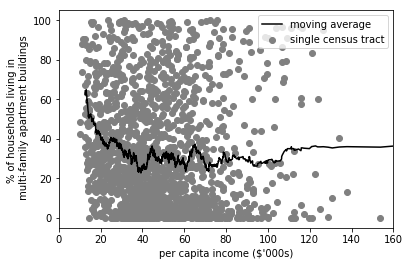

In [8]:
import numpy as np
df_all['RES_single'] = df_all.RES1I
df_all['RES_MFB'] = df_all.loc[:,'RES3AI']*2 +df_all.loc[:,'RES3BI']*3.5+df_all.loc[:,'RES3CI']*7+df_all.loc[:,'RES3DI']*14.5+df_all.loc[:,'RES3EI']*34.5+df_all.loc[:,'RES3FI']*60

f, (ax2) = plt.subplots(1, 1, figsize = (6,4))
x = np.array(df_all['Household Income, Per Capita ($), 2016'].values,dtype = float)

'''
y = np.array((df_all.RES1I/(df_all['RES_MFB']+df_all.RES1I)).values,dtype = float)

prev = 0
x_tr = []
y_tr = []
for i in np.arange(5000,180000,5000):
    x_tr.append((prev+i)/2./1e3)
    index = (x>=prev) & (x<i)
    y_tr.append(np.nanmean(y[index])*100)
    prev = i

xy_pd = pd.DataFrame()
xy_pd['y'] = df_all.RES1I/(df_all['RES_MFB']+df_all.RES1I)
xy_pd['x'] = df_all['Household Income, Per Capita ($), 2016']
xy_pd = xy_pd.sort_values(by = 'x')
y_ma = xy_pd.y.rolling(window=75,min_periods=10).mean()

ax1.scatter(x/1e3,y*100)
ax1.plot(x_tr,y_tr,"r--")
ax1.plot(xy_pd.x/1e3,y_ma*100,"b--")
ax1.set_ylabel('% of hhs in single family buildings')
ax1.set_xlabel("per capita income ($'000s)")
ax1.set_title('Per census tract')
'''
y = np.array((df_all.RES_MFB/(df_all['RES_MFB']+df_all.RES1I)).values,dtype = float)

prev = 0
x_tr = []
y_tr = []

for i in np.arange(5000,180000,5000):
    x_tr.append((prev+i)/2./1e3)
    index = (x>=prev) & (x<i)
    y_tr.append(np.nanmean(y[index])*100)
    prev = i
    
xy_pd = pd.DataFrame()
xy_pd['y'] = df_all.RES_MFB/(df_all['RES_MFB']+df_all.RES1I)
xy_pd['x'] = df_all['Household Income, Per Capita ($), 2016']
xy_pd = xy_pd.sort_values(by = 'x')
y_ma = xy_pd.y.rolling(window=75,min_periods=10).mean()

ax2.scatter(x[x>5000]/1e3,y[x>5000]*100,color = 'gray',label = 'single census tract')
#ax2.plot(x_tr,y_tr,"r--",label = 'average every 5K')
ax2.plot(xy_pd.x/1e3,y_ma*100,"k-",label = 'moving average')
ax2.set_ylabel('% of households living in \n multi-family apartment buildings')
ax2.set_xlabel("per capita income ($'000s)")
ax2.set_xlim(0,160)
plt.legend(loc= 1)

#ax2.set_title('Per census tract')
plt.savefig('./figs/pcinc_vs_housing.png',dpi = 300)
print df_all.TotalCount.sum()

### Conitue original pre-process analysis

In [115]:
# Determine the poverty line
df_pov = pd.DataFrame(df_all.loc[:,['COUNTY','Full_tract','Average Household Size, 2016']])


# Data source: https://www.huduser.gov/portal/datasets/il/il2016/2016summary.odn
df_pov['COUNTY_name'] = ""
county_dic = {1:"Alameda",13:"Contra Costa",41:"Marin",55:"Napa",75:"San Francisco",81:"San Mateo",85:"Santa Clara",95:"Solano",\
               97:"Sonoma"}
unique_counties = df_pov.COUNTY.unique()
for county_num in unique_counties:
     df_pov.loc[lambda df_pov: df_pov.COUNTY == county_num, "COUNTY_name"] = county_dic[county_num]

df_pov_line = pd.read_csv("Input\HUD_poverty_data.csv")
df_pov_line =  df_pov_line.pivot(index='County', columns='FY 2016 income limit category')
num_in_family = np.arange(1,9)
df_pov_line_US = pd.read_csv("Input\FederalRegister_poverty_data.csv")
df_pov_line_US =  df_pov_line_US.pivot(index='County', columns='FY 2016 income limit category')
#print num_in_family
#print list(df_pov_line)#.iloc[:,np.arange(2,24,3)]

for index, row in df_pov.iterrows():   
    county = row['COUNTY_name']
    y = df_pov_line.loc[county].ix[np.arange(1,24,3)]
    df_pov.loc[index,'LIL_hh'] = np.interp(row['Average Household Size, 2016'],num_in_family,y)
    df_pov.loc[index,'LIL_pc'] = df_pov.loc[index,'LIL_hh']/row['Average Household Size, 2016']
    
    y = df_pov_line.loc[county].ix[np.arange(2,24,3)]
    df_pov.loc[index,'VLIL_hh'] = np.interp(row['Average Household Size, 2016'],num_in_family,y)
    df_pov.loc[index,'VLIL_pc'] = df_pov.loc[index,'VLIL_hh']/row['Average Household Size, 2016']
    
    y = df_pov_line.loc[county].ix[np.arange(0,24,3)]
    df_pov.loc[index,'ELIL_hh'] = np.interp(row['Average Household Size, 2016'],num_in_family,y)
    df_pov.loc[index,'ELIL_pc'] = df_pov.loc[index,'ELIL_hh']/row['Average Household Size, 2016']
    
    y = df_pov_line_US.loc['US']
    df_pov.loc[index,'pov_lev_hh'] = np.interp(row['Average Household Size, 2016'],num_in_family,y)
    df_pov.loc[index,'pov_lev_pc'] = df_pov.loc[index,'pov_lev_hh']/row['Average Household Size, 2016']
    
df_pov = df_pov.drop(columns =['COUNTY','COUNTY_name']).rename(index=str, columns={"Average Household Size, 2016": "hh_size"})

df_pov['Full_tract'] = df_pov['Full_tract'].astype('int64') 
df_pov = df_pov.set_index('Full_tract')
df_pov = df_pov.replace(np.inf, 0)

C:\Users\Mary\Anaconda2\lib\site-packages\ipykernel_launcher.py:22: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Users\Mary\Anaconda2\lib\site-packages\ipykernel_launcher.py:26: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Users\Mary\Anaconda2\lib\site-packages\ipykernel_launcher.py:30: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Users\Mary\Anaconda2\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in doub

In [24]:
# Aggregate and clean up the employment columns as per ARIO industries
df_emp = df_all[['OBJECTID','Full_tract','POINT_X', 'POINT_Y']].copy()
df_emp['Emp_AGR'] = df_all['# Employment, Agriculture, Forestry, Fishing and Hunting, 2016']
df_emp['Emp_MIN'] = df_all['# Employment, Mining, Quarrying and Oil and Gas Extraction, 2016']
df_emp['Emp_UTI'] = df_all['# Employment, Utilities, 2016']
df_emp['Emp_CON'] = df_all['# Employment, Construction, 2016']
df_emp['Emp_MAN'] = df_all['# Employment, Manufacturing, 2016']
df_emp['Emp_WHO'] = df_all['# Employment, Wholesale Trade, 2016']
df_emp['Emp_RET'] = df_all['# Employment, Retail Trade, 2016']
df_emp['Emp_TRA'] = df_all['# Employment, Transportation and Warehousing, 2016']
df_emp['Emp_INF'] = df_all['# Employment, Information, 2016']
df_emp['Emp_FIN'] = df_all['# Employment, Finance and Insurance, 2016']+df_all['# Employment, Real Estate and Rental and Leasing, 2016']
df_emp['Emp_PRO'] = df_all['# Employment, Administrative and Support and Waste Mgt. Services, 2016'] + df_all['# Employment, Professional, Scientific, and Technical Services, 2016']\
+df_all['# Employment, Management of Companies and Enterprises, 2016']
df_emp['Emp_EDU'] = df_all['# Employment, Educational Services, 2016'] + df_all['# Employment, Health Care and Social Assistance, 2016']
df_emp['Emp_ART'] = df_all['# Employment, Arts, Entertainment, Accommodation and Food Services, etc., 2016']
df_emp['Emp_OTH'] = df_all['# Employment, Other Services, 2016']
df_emp['Emp_GOV'] = df_all['# Employment, Public Administration, 2016']
#df_emp['Emp_GOV'] = df_all["# Employment, State Government Workers, 2016"]   + df_all["# Employment, Local Government Workers, 2016"]  + df_all["# Employment, Local Government Workers, 2016"]
df_emp['Unemp'] = df_all['# Employment, Unemployed, 2016']
df_emp_total =  df_emp.sum(axis=0).loc["Emp_AGR":'Unemp']
df_emp = df_emp.drop(columns = ['OBJECTID']).rename(index=str, columns={"Full_tract": "tract"}).set_index('tract')
print df_emp
df_emp_total.to_csv('Output\BA_2016_employment_agg_v2.csv')
df_emp.to_csv('Output\BA_2016_employment_tract_v2.csv')


               POINT_X    POINT_Y Emp_AGR Emp_MIN Emp_UTI Emp_CON Emp_MAN  \
tract                                                                       
6001425103 -122.289857  37.842579       0       0       7       4      56   
6001425104 -122.283413  37.832637       8       0      31      94     105   
6001426100 -122.225388  37.821620     115      23      22      27      82   
6001427100 -122.232285  37.765926       0       0      48      58     144   
6001427800 -122.269049  37.771469       0       0       0     140      61   
6001428302 -122.246629  37.742763       0       0      33      81     218   
6001430300 -122.083483  37.721360       0       0      25     110     114   
6001430700 -122.082248  37.706110       0       0      37     218     215   
6001431100 -122.067365  37.688022       0       0       9      80     161   
6001432501 -122.166124  37.716729       0       0      13     221     210   
6001433103 -122.139174  37.709286       0       0      13      40     240   

Check employment totals

In [25]:
df_emp_perc = df_all[['OBJECTID','Full_tract','POINT_X', 'POINT_Y']].copy()
df_emp_perc['Emp_AGR'] = df_all['% Employment, Agriculture, Forestry, Fishing and Hunting, 2016']
df_emp_perc['Emp_UTI'] = df_all['% Employment, Utilities, 2016']
df_emp_perc['Emp_MIN'] = df_all['% Employment, Mining, Quarrying and Oil and Gas Extraction, 2016']
df_emp_perc['Emp_CON'] = df_all['% Employment, Construction, 2016']
df_emp_perc['Emp_MAN'] = df_all['% Employment, Manufacturing, 2016']
df_emp_perc['Emp_WHO'] = df_all['% Employment, Wholesale Trade, 2016']
df_emp_perc['Emp_RET'] = df_all['% Employment, Retail Trade, 2016']
df_emp_perc['Emp_TRA'] = df_all['% Employment, Transportation and Warehousing, 2016']
df_emp_perc['Emp_INF'] = df_all['% Employment, Information, 2016']
df_emp_perc['Emp_FIN'] = df_all['% Employment, Finance and Insurance, 2016']+df_all['% Employment, Real Estate and Rental and Leasing, 2016']
df_emp_perc['Emp_PRO'] = df_all['% Employment, Administrative and Support and Waste Mgt. Services, 2016'] + df_all['% Employment, Professional, Scientific, and Technical Services, 2016']\
+df_all['% Employment, Management of Companies and Enterprises, 2016']
df_emp_perc['Emp_EDU'] = df_all['% Employment, Educational Services, 2016'] + df_all['% Employment, Health Care and Social Assistance, 2016']
df_emp_perc['Emp_ART'] = df_all['% Employment, Arts, Entertainment, Accommodation and Food Services, etc., 2016']
df_emp_perc['Emp_OTH'] = df_all['% Employment, Other Services, 2016']
df_emp_perc['Emp_GOV'] = df_all['% Employment, Public Administration, 2016']
#df_emp_perc['Emp_GOV'] = df_all["% Employment, State Government Workers, 2016"]   + df_all["% Employment, Local Government Workers, 2016"]  + df_all["% Employment, Local Government Workers, 2016"]
#print df_emp_perc.loc[:,"Emp_AGR":'Emp_GOV'].sum(axis=1).sort_values(axis = 0)

Write the overall output file

In [26]:
# Output data specifically for the resilience model

# Get country names in
#print df_all.loc[:,['COUNTY','Full_tract','# Population, 2016']]
df_all['COUNTY_name'] = ""
county_dic = {1:"Alameda",13:"Contra Costa",41:"Marin",55:"Napa",75:"San Francisco",81:"San Mateo",85:"Santa Clara",95:"Solano",\
               97:"Sonoma"}
unique_counties = df_all.COUNTY.unique()
for county_num in unique_counties:
     df_all.loc[lambda df_all: df_all.COUNTY == county_num, "COUNTY_name"] = county_dic[county_num]
#print df_all.loc[:,['# Population, 2016']].sum()



########### Output a file equivalent to 'finalhhframe' in resilience model
# Add average income per industry per worker for each of the counties
df_peinc_ind = pd.read_csv("Bay area - final employment statistics.csv",index_col = 'ID').transpose()
for county_num in unique_counties:
    for industry in list(df_peinc_ind):
        df_all.loc[lambda df_all: df_all.COUNTY == county_num, industry] = df_peinc_ind.loc[county_dic[county_num],industry]
        
# Get the total number of dependents
df_all['Dependents'] =  df_all.loc[:,['# Population, 0 to 5 Years, 2016', '# Population, 6 to 11 Years, 2016',
                  '# Population, 12 to 17 Years, 2016', '# Population, 65 Years and Older, 2016']].sum(axis=1)

# Per capital social assistance and mortgage
df_all.loc[df_all['# Population, 2016']==0,['# Population, 2016']] =  float('inf')
df_all['pension_ss_pc']=df_all['Pensions and Social Security ($000), 2016'].div(df_all['# Population, 2016'])*1000
df_all['mortgage_pc'] = df_all['Mortgage interest and charges ($000), 2016'].div(df_all['# Population, 2016'])*1000
df_all.loc[df_all['# Population, 2016']== float('inf'),['# Population, 2016']] = 0

# Get the total number of dependents
df_all['hh_share'] =  1-df_all.loc[:,['% Housing, Renter Occupied, 2016']]/100


# Write the outputs
df_out = pd.DataFrame(df_all.loc[:,['COUNTY','COUNTY_name','Full_tract','# Population, 2016',
                                    '# Total Households, 2016','Household Income, Per Capita ($), 2016',
                                    '% Population in Poverty, Total, 2016','Dependents','hh_share','Value of savings, checking, money market, and CDs (Household Average), 2016',
                                    'pension_ss_pc','total_asset_value','mortgage_pc',
                                    'peinc_AGR','peinc_MIN','peinc_UTI','peinc_CON','peinc_MAN','peinc_WHO','peinc_RET','peinc_TRA',
                                    'peinc_INF','peinc_FIN','peinc_PRO','peinc_EDU','peinc_ART','peinc_OTH','peinc_GOV',
                                    '# Total Households with Public Assistance Income, 2016',
                                    '# Households w/ Income Less than $15,000, 2016', '# Households w/ Income $15,000 to $24,999, 2016',
                                    '# Households w/ Income $25,000 to $34,999, 2016','# Households w/ Income $35,000 to $49,999, 2016','# Households w/ Income $50,000 to $74,999, 2016',  
                                    '# Households w/ Income $75,000 to $99,999, 2016', '# Households w/ Income $100,000 to $124,999, 2016','# Households w/ Income $125,000 to $149,999, 2016', 
                                    '# Households w/ Income $150,000 to $199,999, 2016', '# Households w/ Income $200,000 and Over, 2016']])#,

df_out.columns = ['county_id','county_name','tract','pcwgt','n_hh','pcinc','pov_frac','pop_dep','hh_share','savings_per_hh',
                 'pension_ss_pc','hh_str_asset_value','mort_pc',
                 'peinc_AGR','peinc_MIN','peinc_UTI','peinc_CON','peinc_MAN','peinc_WHO','peinc_RET','peinc_TRA',
                  'peinc_INF','peinc_FIN','peinc_PRO','peinc_EDU','peinc_ART','peinc_OTH','peinc_GOV',
                 'hh_pub_ass_inc','n_hh_inc_less15','n_hh_inc_15_25','n_hh_inc_25_35','n_hh_inc_35_50','n_hh_inc_50_75',
                 'n_hh_inc_75_100','n_hh_inc_100_125','n_hh_inc_125_150','n_hh_inc_150_200','n_hh_inc_more200']
df_out['pov_frac'] = df_out['pov_frac']/100 

# Merge with poverty data
df_out = pd.merge(df_out, df_pov, how='inner',left_on='tract',right_index=True)

# Merge with employment data
df_out = pd.merge(df_out, df_emp, how='inner',left_on='tract',right_index=True)
drop_columns = ['POINT_X', 'POINT_Y']
df_out = df_out.drop(columns = drop_columns)

print list(df_out)
#print df_out
df_out.to_csv('Output\INPUT_for_resilience_model_v2.csv',index = False)

['county_id', 'county_name', 'tract', 'pcwgt', 'n_hh', 'pcinc', 'pov_frac', 'pop_dep', 'hh_share', 'savings_per_hh', 'pension_ss_pc', 'hh_str_asset_value', 'mort_pc', 'peinc_AGR', 'peinc_MIN', 'peinc_UTI', 'peinc_CON', 'peinc_MAN', 'peinc_WHO', 'peinc_RET', 'peinc_TRA', 'peinc_INF', 'peinc_FIN', 'peinc_PRO', 'peinc_EDU', 'peinc_ART', 'peinc_OTH', 'peinc_GOV', 'hh_pub_ass_inc', 'n_hh_inc_less15', 'n_hh_inc_15_25', 'n_hh_inc_25_35', 'n_hh_inc_35_50', 'n_hh_inc_50_75', 'n_hh_inc_75_100', 'n_hh_inc_100_125', 'n_hh_inc_125_150', 'n_hh_inc_150_200', 'n_hh_inc_more200', 'hh_size', 'LIL_hh', 'LIL_pc', 'VLIL_hh', 'VLIL_pc', 'ELIL_hh', 'ELIL_pc', 'pov_lev_hh', 'pov_lev_pc', 'Emp_AGR', 'Emp_MIN', 'Emp_UTI', 'Emp_CON', 'Emp_MAN', 'Emp_WHO', 'Emp_RET', 'Emp_TRA', 'Emp_INF', 'Emp_FIN', 'Emp_PRO', 'Emp_EDU', 'Emp_ART', 'Emp_OTH', 'Emp_GOV', 'Unemp']


check consistency with previous version

In [27]:
df_check1 = pd.read_csv('Output\INPUT_for_resilience_model.csv')
df_check2 = pd.read_csv('Output\INPUT_for_resilience_model_v2.csv')

print (df_check1.pov_lev_pc-df_check2.pov_lev_pc).sum()


-3.8297912397e-07


### Save the output table

In [28]:
df_all.to_csv('Bay_area_exposure_merged.csv')